In [4]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import dateutil

/Users/eliseowang/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
sns.set_style('whitegrid')
sns.set_color_codes('muted')

In [3]:
tips = sns.load_dataset('tips')

In [4]:
sizes = list(tips['size']).__iter__()

In [5]:
count = {}
for i in sizes:
    count[i] = count.get(i, 0) + 1

In [6]:
count

{1: 4, 2: 156, 3: 38, 4: 37, 5: 5, 6: 4}

In [7]:
#data = {'size': count.keys(), 'count': count.values()}

In [8]:
df = pd.DataFrame.from_dict(count, orient='index')
df

,0
1,4
2,156
3,38
4,37
5,5
6,4


/Users/eliseowang/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


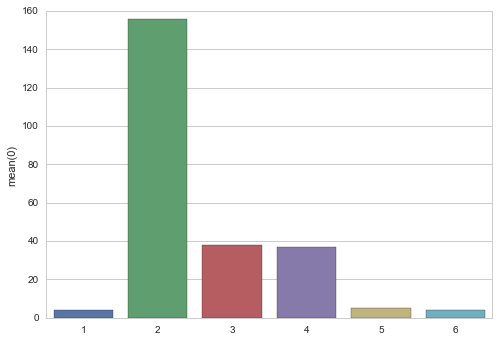

In [9]:
sns.barplot(x= df.index, y = df[0])

In [10]:
df[0]

1      4
2    156
3     38
4     37
5      5
6      4
Name: 0, dtype: int64

In [11]:
total = df[0].sum()
CurSum = 0
med = None
for k, v in sorted(count.iteritems()):
    CurSum += v
    if CurSum >= total/2.0:
        med = k
        break

In [12]:
med

2

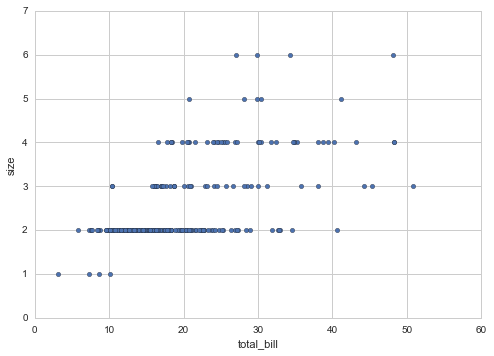

In [13]:
tips.plot(kind = 'scatter', 
          x = 'total_bill', y = 'size')

In [14]:
bill_size = tips[['total_bill', 'size']]

In [15]:
def data_stream(bill_size, chunk_size = 50):
    for i in xrange(0, len(bill_size), chunk_size):
        yield bill_size[i: i+chunk_size]
g = data_stream(bill_size, 50)
#data_stream(bill_size, 50)        

In [16]:
g.next()

,total_bill,size
0,16.99,2
1,10.34,3
2,21.01,3
3,23.68,2
4,24.59,4
5,25.29,4
6,8.77,2
7,26.88,4
8,15.04,2
9,14.78,2


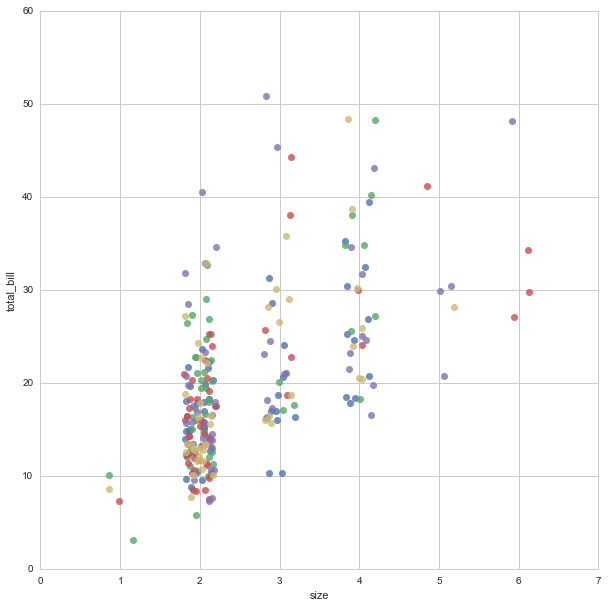

In [17]:
fig, ax = plt.subplots(figsize = (10,10))
for c in data_stream(bill_size, 50):
    sns.regplot(x='size', y = 'total_bill',
                x_jitter = 0.2,
                data = c, fit_reg=False,
                scatter_kws={'s':50})
#     c.plot(kind = 'scatter', 
#            x = 'total_bill', y = 'size',
#            ax = ax, c = color[])

In [6]:
with open('citibike.csv', 'r') as fi:
    reader = csv.DictReader(fi)
    for row in reader:
        starttime = dateutil.parser.parse(row['starttime'])
        starttime.hour, starttime.weekday()
        break

SyntaxError: 'yield' outside function (<ipython-input-6-493751818601>, line 5)

In [19]:
def citibike_hod(filename):
    with open(filename, 'r') as fi:
        reader = csv.DictReader(fi)
        for row in reader:
            starttime = dateutil.parser.parse(row['starttime'])
            yield starttime.hour

In [20]:
g = citibike_hod('citibike.csv')

In [21]:
count_bike = {}
for hod in g:
    count_bike[hod] = count_bike.get(hod, 0) + 1

In [22]:
df_bike = pd.DataFrame.from_dict(count_bike, orient='index')

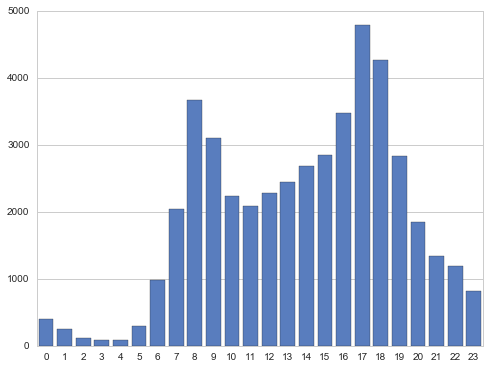

In [28]:
plt.figure(figsize = (8,6))
sns.barplot(x = count_bike.keys(), y = count_bike.values(), color = 'b')
#sns.barplot(x= df_bike.index, y = df_bike[0], color = 'b')